In [3]:
import numpy as np
from torchvision import datasets, transforms
import torch
import pandas as pd
#from google.colab import files
import os
import seaborn as sns
import matplotlib.pyplot as plt



USE_CUDA = torch.cuda.is_available()
# USE_CUDA = False
DLD_DATA = True
print(USE_CUDA)

False


In [1]:
import onnx
from onnx2pytorch import ConvertModel

#python: aliased to /opt/homebrew/bin/python3.9
#/opt/homebrew/bin/pip

import os
onnx_model = onnx.load(f"{os.getcwd()}/mnist-net_256x4.onnx")
pytorch_model = ConvertModel(onnx_model)

c:\Users\longq\anaconda3\lib\site-packages\onnx2pytorch\convert\layer.py:30: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_numpy.cpp:212.)
  layer.weight.data = torch.from_numpy(numpy_helper.to_array(weight))


In [4]:
TRAIN_BS = 30
TEST_BS = 30

device = torch.device("cuda" if USE_CUDA else "cpu")
train_kwargs = {'batch_size': TRAIN_BS, 'shuffle': False}
test_kwargs = {'batch_size': TEST_BS, 'shuffle': False}
# if USE_CUDA:
#     cuda_kwargs = {'num_workers': 1,
#                    'pin_memory': True,
#                    'shuffle': True}
#     train_kwargs.update(cuda_kwargs)
#     test_kwargs.update(cuda_kwargs)

transform = transforms.Compose([
    transforms.ToTensor(),
])


train_set = datasets.MNIST('./data', train=True, download=DLD_DATA,
                          transform=transform)
test_set = datasets.MNIST('./data', train=False, download=DLD_DATA,
                          transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, **train_kwargs)
test_loader = torch.utils.data.DataLoader(test_set, **test_kwargs)

for train_data, train_target in train_loader:
    print(train_data.size())
    print(train_target.size())

torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size

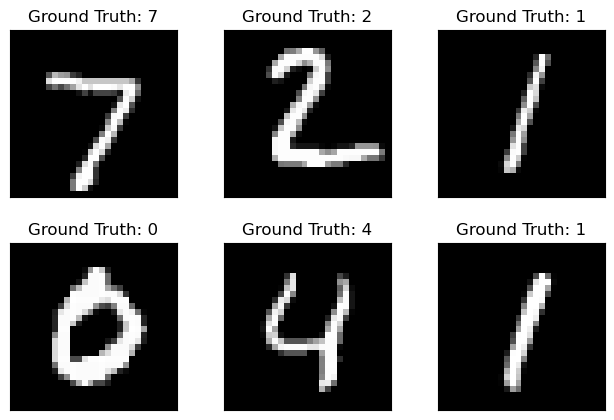

In [5]:
import matplotlib.pyplot as plt
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1) #2 rows, 3 columns. 1 2 3, (next row) 4 5 6
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

#plt.savefig('figure.png', dpi=300, bbox_inches='tight')
#plt.close(fig)  # Close the figure window


In [6]:
len(example_data[0][0][0])

28

In [7]:
pytorch_model(example_data[0]).argmax()
#example_targets[0]

tensor(7)

In [8]:
pytorch_model #(train_set[10])
# ConvertModel(
#   (Flatten_11): Flatten() 28x28
#   (Gemm_12): Linear(in_features=784, out_features=256, bias=True)
#   (Relu_13): ReLU(inplace=True)
#   (Gemm_14): Linear(in_features=256, out_features=256, bias=True)
#   (Relu_15): ReLU(inplace=True)
#   (Gemm_16): Linear(in_features=256, out_features=256, bias=True)
#   (Relu_17): ReLU(inplace=True)
#   (Gemm_18): Linear(in_features=256, out_features=256, bias=True)
#   (Relu_19): ReLU(inplace=True)
#   (Gemm_20): Linear(in_features=256, out_features=10, bias=True)
# )

ConvertModel(
  (Flatten_11): Flatten()
  (Gemm_12): Linear(in_features=784, out_features=256, bias=True)
  (Relu_13): ReLU(inplace=True)
  (Gemm_14): Linear(in_features=256, out_features=256, bias=True)
  (Relu_15): ReLU(inplace=True)
  (Gemm_16): Linear(in_features=256, out_features=256, bias=True)
  (Relu_17): ReLU(inplace=True)
  (Gemm_18): Linear(in_features=256, out_features=256, bias=True)
  (Relu_19): ReLU(inplace=True)
  (Gemm_20): Linear(in_features=256, out_features=10, bias=True)
)

In [9]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook


# Attach the hook to the 1st layer
pytorch_model.Relu_13.register_forward_hook(get_activation('relu1'))
pytorch_model.Relu_15.register_forward_hook(get_activation('relu2'))
pytorch_model.Relu_17.register_forward_hook(get_activation('relu3'))
pytorch_model.Relu_19.register_forward_hook(get_activation('relu4'))


In [75]:

# len(non_zero_neurons2set)
with open('non_zero_neurons_relu4.txt', 'w+') as f:
    # write elements of list
    for n in neurons_relu4:
        f.write('%s,' %n)
f.close()


In [76]:
file = open(f'{os.getcwd()}/non_zero_neurons_relu4.txt', 'r')
contents = file.read()
file.close()
neurons_relu4 = [int(num) for num in contents.replace('\n', '').split(',') if num]
neurons_relu4

[2,
 7,
 9,
 14,
 24,
 25,
 26,
 29,
 36,
 37,
 38,
 39,
 41,
 43,
 46,
 49,
 50,
 53,
 55,
 58,
 62,
 67,
 68,
 69,
 71,
 74,
 75,
 76,
 79,
 81,
 83,
 85,
 86,
 90,
 92,
 93,
 95,
 98,
 101,
 105,
 106,
 107,
 117,
 120,
 124,
 124,
 129,
 133,
 135,
 142,
 143,
 144,
 148,
 150,
 153,
 155,
 157,
 160,
 161,
 162,
 166,
 169,
 170,
 176,
 179,
 181,
 183,
 190,
 191,
 196,
 197,
 198,
 202,
 204,
 205,
 209,
 211,
 214,
 217,
 224,
 225,
 226,
 227,
 229,
 235,
 239,
 241,
 248,
 251,
 253]

In [39]:
def compare_two_lists(list1,list2,l1,l2):
    mean1=np.mean(list1)
    mean2=np.mean(list2)
    if (mean1<mean2 and (mean1+np.std(list1) >= mean2-np.std(list2)) or (mean1>=mean2 and (mean2+np.std(list2) >= mean1-np.std(list1)))): #quantile?
        range=(min(min(list1), min(list2)), max((max(list1), max(list2))))
        l1.extend(l2)
        return [l1,range]

    l_list, r_list=list1,list2
    label1,label2=l1,l2
    if max(list1)>=max(list2): #use max is more reasonable!
        r_list=list1
        l_list=list2
        label1, label2=l2,l1

    throwaway_1=throwaway_2=0
    while(throwaway_1<len(l_list)*0.1 and throwaway_2<len(r_list)*0.1 and (not max(l_list)<min(r_list))):
        l_list.remove(max(l_list))
        throwaway_1+=1
        r_list.remove(min(r_list))
        throwaway_2+=1
    middle_split=(max(l_list)+min(r_list))/2
    return [label1,(min(l_list),max(l_list))],[label2,(min(r_list),max(r_list))]

# def compare_onemore_list(group1, new_label):
#     if len(group1)==1:
#         cur_combined_list = []
#         for label in group1[0]:
#             cur_combined_list.extend(relu4[150][label].copy())
#         return compare_two_lists(cur_combined_list,relu4[150][new_label].copy(),group1[0],[new_label])

#     else:
#         cur_combined_list = []
#         for label in group1[0][0]:
#             cur_combined_list.extend(relu4[150][label].copy())
#         compare_two_lists(cur_combined_list,relu4[150][new_label].copy(),group1[0][0],[new_label])

#         cur_combined_list = []
#         for label in group1[1][0]:
#             cur_combined_list.extend(relu4[150][label].copy())
#         compare_two_lists(cur_combined_list,relu4[150][new_label].copy(),group1[1][0],[new_label])


# things = [0,2,8]
# group=compare_two_lists(relu4[150][0].copy(),relu4[150][2].copy(),[0],[2])
# #group
# compare_onemore_list(group,8)

compare_two_lists(relu4[150][0].copy(),relu4[150][2].copy(),[0],[2])

([[0], (0.0, 0.8424901962280273)],
 [[2], (0.3123128414154053, 1.0488533973693848)])

In [54]:
def find_quanlifed_states_with_stats(neuron_list,bound1=10,bound2=90):
    label_stats = {}
    for label in range(10):
        if np.median(neuron_list[label]) > 0.02:
            label_stats[label] = [np.percentile(neuron_list[label],10), np.percentile(neuron_list[label],90)]

    return label_stats
find_quanlifed_states_with_stats(relu4[150])

{0: [0.6968177199363709, 0.8377642512321473],
 2: [0.31992331743240354, 0.5130424797534943],
 8: [0.822842812538147, 1.2127340316772461]}

In [ ]:
def overlapping_ratio(list_, range_):
    len_ = len(list_)
    counter = 0
    for i in list_:
        if i >= range_[0] and i <= range_[1]:
            counter += 1
    return counter / len_

overlapping_ratio(list_, range_)



In [ ]:
# Finding dependency bewteen neurons conditioning on labels

In [83]:


def find_dead_neurons(relu_):
    dead_neurons_layer = [] 
    for i in range(256):
        flag= 0
        for j in range(10):
            if relu_[i][j] == []:
                continue
            else:
                flag = 1
        if flag == 0 :
            dead_neurons_layer.append(i)

    return dead_neurons_layer

dead_neurons_layer1 = find_dead_neurons(relu1)
dead_neurons_layer2 = find_dead_neurons(relu2)
dead_neurons_layer3 = find_dead_neurons(relu3)
dead_neurons_layer4 = find_dead_neurons(relu4)

dead_neurons_layer4

[0,
 1,
 3,
 4,
 5,
 6,
 8,
 10,
 11,
 12,
 13,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 27,
 28,
 30,
 31,
 32,
 33,
 34,
 35,
 40,
 42,
 44,
 45,
 47,
 48,
 51,
 52,
 54,
 56,
 57,
 59,
 60,
 61,
 63,
 64,
 65,
 66,
 70,
 72,
 73,
 77,
 78,
 80,
 82,
 84,
 87,
 88,
 89,
 91,
 94,
 96,
 97,
 99,
 100,
 102,
 103,
 104,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 121,
 122,
 123,
 125,
 126,
 127,
 128,
 130,
 131,
 132,
 134,
 136,
 137,
 138,
 139,
 140,
 141,
 145,
 146,
 147,
 149,
 151,
 152,
 154,
 156,
 158,
 159,
 163,
 164,
 165,
 167,
 168,
 171,
 172,
 173,
 174,
 175,
 177,
 178,
 180,
 182,
 184,
 185,
 186,
 187,
 188,
 189,
 192,
 193,
 194,
 195,
 199,
 200,
 201,
 203,
 206,
 207,
 208,
 210,
 212,
 213,
 215,
 216,
 218,
 219,
 220,
 221,
 222,
 223,
 228,
 230,
 231,
 232,
 233,
 234,
 236,
 237,
 238,
 240,
 242,
 243,
 244,
 245,
 246,
 247,
 249,
 250,
 252,
 254,
 255]

In [115]:
def find_stable_states(ratio,relu_,label,dead_neurons_layer):
    activation = []
    deactivation = []
    for i in range(256):
        if i in dead_neurons_layer:
            pass
        else:
            inspect = relu_[i][label]
            len_ = len(inspect)
            zero_counter = 0
            for k in inspect:
                if k == 0:
                    zero_counter += 1
            if zero_counter / len_ <= ratio:
                deactivation.append(i)
            if zero_counter / len_ >= 1 - ratio:
                activation.append(i)
    return activation,deactivation





def collect_states_wrt_label(label,ratio):
    activation_dict = dict()
    deactivation_dict = dict()
    act1,deact1 = find_stable_states(ratio,relu1,label,dead_neurons_layer1)
    act2,deact2 = find_stable_states(ratio,relu2,label,dead_neurons_layer2)
    act3,deact3 = find_stable_states(ratio,relu3,label,dead_neurons_layer3)
    act4,deact4 = find_stable_states(ratio,relu4,label,dead_neurons_layer4)
    activation_dict['layer1'] = act1
    deactivation_dict['layer1'] = deact1
    activation_dict['layer2'] = act2
    deactivation_dict['layer2'] = deact2                     
    activation_dict['layer3'] = act3
    deactivation_dict['layer3'] = deact3
    activation_dict['layer4'] = act4
    deactivation_dict['layer4'] = deact4
    return  activation_dict, deactivation_dict
        
         

    

activation,deactivation = find_stable_states(0.01,relu2,7,dead_neurons_layer2)
print(len(activation))
print(len(deactivation))


activation_dict0, deactivation_dict0 = collect_states_wrt_label(0,0.01)
activation_dict1, deactivation_dict1 = collect_states_wrt_label(1,0.01)
activation_dict2, deactivation_dict2 = collect_states_wrt_label(2,0.01)
activation_dict3, deactivation_dict3 = collect_states_wrt_label(3,0.01)
activation_dict4, deactivation_dict4 = collect_states_wrt_label(4,0.01)
activation_dict5, deactivation_dict5 = collect_states_wrt_label(5,0.01)
activation_dict6, deactivation_dict6 = collect_states_wrt_label(6,0.01)
activation_dict7, deactivation_dict7 = collect_states_wrt_label(7,0.01)
activation_dict8, deactivation_dict8 = collect_states_wrt_label(8,0.01)
activation_dict9, deactivation_dict9 = collect_states_wrt_label(9,0.01)

all_states_activation = []
all_states_deactivation = []

for i in range(10):
    activation_dict, deactivation_dict = collect_states_wrt_label(i,0.01)
    all_states_activation.append(activation_dict)
    all_states_deactivation.append(deactivation_dict)

99
3


In [120]:
len(all_states_activation)

10

In [137]:

def to_lofS(layer_,all_states_):
    lofs = []
    key = 'layer'+str(layer_)
    for i in range(10):
        temp = all_states_[i][key]
        lofs.append(set(temp))
    return lofs


act_lofS1 = to_lofS(1,all_states_activation)
deact_lofS1 = to_lofS(1,all_states_deactivation)


act_lofS2 = to_lofS(2,all_states_activation)
deact_lofS2 = to_lofS(2,all_states_deactivation)


act_lofS3 = to_lofS(3,all_states_activation)
deact_lofS3 = to_lofS(3,all_states_deactivation)


act_lofS4 = to_lofS(4,all_states_activation)
deact_lofS4 = to_lofS(4,all_states_deactivation)


In [138]:

find_unique_elements(act_lofS1)

[[137, 13, 33, 166, 49, 57, 191, 68, 213],
 [128, 146, 147, 20, 159, 170, 46, 179, 210, 89, 233, 240, 113, 242, 119],
 [139, 35, 229],
 [138, 25, 121],
 [37, 71, 214],
 [],
 [12, 95],
 [198],
 [104],
 [161, 194, 90]]

In [139]:
find_unique_elements(deact_lofS1)

[[159], [187], [], [], [], [], [], [], [], []]

In [140]:
find_unique_elements(act_lofS2)

[[134, 154, 43, 189, 206, 95, 96, 234],
 [140, 44, 49, 93, 226, 101],
 [5, 54, 225],
 [22, 159, 48, 90],
 [71, 244],
 [67, 110],
 [190],
 [191, 74, 214, 248],
 [],
 [148]]

In [141]:
find_unique_elements(deact_lofS2)

[[29, 91, 93, 230, 104, 233, 114, 255],
 [21, 204, 248],
 [58],
 [],
 [140, 209, 90, 246],
 [5, 49, 191, 103],
 [144, 53, 102],
 [180, 221, 226],
 [],
 [240]]

In [142]:
find_unique_elements(act_lofS3)

[[], [], [], [], [], [], [], [], [], []]

In [143]:
find_unique_elements(deact_lofS3)

[[192], [61], [], [], [], [], [74], [], [], []]

In [144]:
find_unique_elements(act_lofS4)

[[226, 36], [106, 235, 86], [], [183], [], [], [129, 248], [], [], []]

In [145]:
find_unique_elements(deact_lofS4)

[[183], [36, 107], [], [144, 248], [], [135], [], [241, 55, 191], [], [93]]

In [118]:
from collections import Counter
import itertools

def find_unique_elements(lofs):
    c = Counter(itertools.chain.from_iterable(lofs)) 
    res = {k for k,v in c.items() if v==1}
    res_li = []
    for i in range(len(lofs)):
        si = lofs[i]
        li = []
        for j in res:
            if j in si:
                li.append(j)
        res_li.append(li)
    return res_li


s1 = {1, 2, 3, 4}
s2 = {1, 3, 4}
s3 = {1, 4}
s4 = {3, 4}
s5 = {1, 4, 5}

s = [s1, s2, s3, s4, s5]

find_unique_elements(s)

[[2], [], [], [], [5]]

In [119]:
set([1,2])

{1, 2}

In [10]:

non_zero_neurons1=[]
Neurons= list(range(256)) #0, 100 all close
layer='relu1'
activation_list=[]
sample_record_list = []
for n in Neurons:
    temp_a=[]
# Pass data through the network and print the activation of the 4th neuron in the 1st layer
    for batch_idx, (example_data, example_targets) in enumerate(test_loader):
        for i,t in zip(example_data,example_targets):
            sample_record_list.append(t)
            output = pytorch_model(i)
            # Assuming the 4th neuron's output is what you want; adjust indexing as needed
            neuron_output = activation[layer][:, n]
            #print(neuron_output)
            temp_a.append(neuron_output.tolist()[0])
        # if batch_idx>5:
        #     break  # Remove break to process the entire dataset
        labels = list(map(lambda x: int(x), sample_record_list))
    all_zeros = all(x == 0 for x in temp_a)
    if all_zeros:
        print(f'neuron {n} is all zeros')
    else:
        non_zero_neurons1.append(n)

        #activation_list.append(temp_a)
    #t.reshape(1).squeeze() 还原了 tensor:() = tensor(0)

neuron 17 is all zeros
neuron 18 is all zeros
neuron 19 is all zeros
neuron 22 is all zeros
neuron 28 is all zeros
neuron 31 is all zeros
neuron 32 is all zeros


KeyboardInterrupt: 

In [21]:
import json

with open("all_relu1.txt", "r") as fp:
    relu1 = json.load(fp)

with open("all_relu2.txt", "r") as fp:
    relu2 = json.load(fp)

with open("all_relu3.txt", "r") as fp:
    relu3 = json.load(fp)

with open("all_relu4.txt", "r") as fp:
    relu4 = json.load(fp)

In [38]:
relu4[255][0]

[]

In [80]:
import numpy as np
import time
start=time.time()
#info = np.zeros((10000,10))
matrix = [ [ [] for i in range(10) ] for j in range(256) ]
for n in neurons_relu4:
    print(n)
    #temp_a=[]
    for batch_idx, (example_data, example_targets) in enumerate(test_loader):
        for i,t in zip(example_data,example_targets):
            output = pytorch_model(i)
            neuron_output = activation['relu4'][:, n]
            #temp_a.append(neuron_output.tolist()[0])
            matrix[n][int(t)].append(neuron_output.tolist()[0])
# end=time.time()
# print(start-end)


2
7
9
14
24
25
26
29
36
37
38
39
41
43
46
49
50
53
55
58
62
67
68
69
71
74
75
76
79
81
83
85
86
90
92
93
95
98
101
105
106
107
117
120
124
124
129
133
135
142
143
144
148
150
153
155
157
160
161
162
166
169
170
176
179
181
183
190
191
196
197
198
202
204
205
209
211
214
217
224
225
226
227
229
235
239
241
248
251
253


In [248]:
max_relu4=[]
for i in range(10):
    max_relu4.append(max([max(x[i]) for x in b if len(x[i])>0])) #x: each row of neuron

In [73]:
neurons_relu4=sorted(neurons_relu4)

In [90]:
import json
# with open("all_relu4", "w") as fp:
#     json.dump(matrix, fp)

file = open(f'{os.getcwd()}/non_zero_neurons_relu2.txt', 'r')
contents = file.read()
file.close()
neurons_relu2 = [int(num) for num in contents.replace('\n', '').split(',') if num]


with open("all_relu2", "r") as fp:
    relu2 = json.load(fp)


In [154]:

import matplotlib.pyplot as plt
# Create subplots for each label
#fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(10, 20))  # Adjust figsize as needed

layer=3 #TODO: here ·
layer2_validneurons=[]
layer3_states={}
# Plot histograms for each label
for neuron_index, neuron in enumerate(neurons_relu3): #TODO: here
  #print(neuron)
  fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(10, 20))
  fig.suptitle(f'Neuron {neuron} in {layer}', fontsize=16,y=1)
  fig.subplots_adjust(top=0.95)
  neuron_max=max(max(x) for x in relu3[neuron]) #TODO: here
  count=0

  for i in range(10):  # Assuming 10 labels
    ax = axes[i]
    layer3_states[neuron]=[[] for i in range(10)]
    data=relu3[neuron][i] #TODO: here
    if(max(data)==0) or ((len(data)-data.count(0))/len(data))<0.025: #or np.median(data)==0:
        continue
        #print(f'mean of label {i}: {np.mean(list_of_lists[i])} \n std of label {i}: {np.std(list_of_lists[i])}')
    # temp_fig = plt.figure()
    # counts, bin_edges, patches = plt.hist(data, bins=20)  # Adjust the number of bins as necessary
    # plt.close(temp_fig)
    #if ((len(data)-data.count(0))/len(data))<0.05 or np.median(data)==0:#((len(data)-data.count(0))/len(data))<0.05:#median!=0:#len(counts)<3:#counts[0] > max(counts[1:]):  # Check if the first bin count is higher than the rest
      #continue
    data.remove(max(data))
    layer3_states[neuron][i]=data
    #print(layer3_states[neuron])
    mean = np.mean(data)
    median = np.median(data)
    std = np.std(data)
    max_val=max(data)
    count=count+1
    #print(f"neuron:{neuron}, label{i}: range:{mean-std}, {mean+std},")
    ax.hist(data, bins=20, color='red', alpha=0.5, label=f'Neuron {neuron_index+1}') #width=0.1
    ax.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    ax.axvline(max_val, color='r', linestyle='dotted', linewidth=2, label=f'Max: {max_val:.2f}')
    ax.axvline(median, color='g', linestyle='dotted', linewidth=2, label=f'Median: {median:.2f}')
    ax.axvline(mean - std, color='b', linestyle='dashed', linewidth=1, label=f'Std Dev: {std:.2f}')
    ax.axvline(mean + std, color='b', linestyle='dashed', linewidth=1)
    ax.set_xlim([-1, neuron_max])
    ax.legend()

    ax.set_title(f'Label {i} (nonzero datapoints: {(len(data)-data.count(0))}/{len(data)})')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

  if count>0:
    layer2_validneurons.append(neuron)
    axes[0].legend()
    plt.tight_layout()
    plt.savefig(f'neurons/layer{layer}_states/{neuron}')
    #plt.show()
  plt.close()
with open("filtered_relu3_activations", "w") as fp:
  json.dump(layer3_states, fp)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:11, label4: range:9.901965894761247, 21.440403972025187,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:27, label3: range:11.163009882726612, 24.135486914628373,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:31, label9: range:2.974772692887329, 7.375226783422111,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:43, label9: range:5.551758160055686, 11.983179657721882,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:61, label1: range:12.164768843231624, 19.554710061178824,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:74, label6: range:19.070472391129698, 32.97989381311009,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:107, label8: range:-0.47213181123349957, 0.7385142683483861,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:109, label7: range:-0.17461487262500375, 0.22678060396201605,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:118, label9: range:-0.5554880935015108, 1.8838551341588916,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:121, label2: range:9.184068950334922, 22.05882981386254,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:174, label9: range:-0.3439231985000552, 0.45229546671703963,
neuron:192, label0: range:9.552630225039131, 20.359968380488123,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:200, label3: range:-0.5078520392937192, 0.6536562352091763,
neuron:200, label5: range:12.779240048485232, 23.44926053198024,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:205, label8: range:-0.24427317818851657, 0.37684397742532494,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:211, label8: range:7.099640367216955, 15.989613973773347,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:229, label3: range:0.39329104024540285, 2.5504247640129476,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:252, label7: range:7.94208201441644, 16.008946974978688,


## Max Activation Value

In [ ]:
import json
import os

def create_storage_dict(relu_number):
  single_data = next(iter(test_loader))
  pytorch_model.eval()
  with torch.no_grad():
    single_output = pytorch_model(single_data[0][0])
  _, features_shape = activation[f'relu{relu_number}'].shape
  _, label_shape = single_output.shape

  storage = dict()
  for i in range(int(label_shape)):
    class_label = f'class{i}'
    storage[class_label] = dict()

    for j in range(int(features_shape)):
        neuron_label = f'neuron{j}'
        storage[class_label][neuron_label] = 0
  return storage

In [ ]:
if not os.path.exists(os.path.join(os.getcwd(), 'max_activation')):
  # Initialize dictionary to store activations for each layer
  activations_relu1_max = create_storage_dict(1)
  activations_relu2_max = create_storage_dict(2)
  activations_relu3_max = create_storage_dict(3)
  activations_relu4_max = create_storage_dict(4)

  def set_max(activations_relu, activation_max):
    for neuron_i in range(len(activations_relu)):
      neuron_label = f'neuron{neuron_i}'
      if activations_relu[neuron_i] > activation_max[neuron_label]:
        activation_max[neuron_label] = activations_relu[neuron_i]
    return activation_max

  # Itrate through all images and record the max activation for each neurons per label
  for batch_idx, (example_data, example_targets) in enumerate(test_loader):
    for i,t in zip(example_data,example_targets):
      pytorch_model.eval()
      with torch.no_grad():
        output = pytorch_model(i)

      current_class = f'class{t.item()}'
      # Access the recorded activations for each layer
      activations_relu1 = activation['relu1']
      activations_relu2 = activation['relu2']
      activations_relu3 = activation['relu3']
      activations_relu4 = activation['relu4']

      activations_relu1_max[current_class] = set_max(activations_relu1.tolist()[0], activations_relu1_max[current_class])
      activations_relu2_max[current_class] = set_max(activations_relu2.tolist()[0], activations_relu2_max[current_class])
      activations_relu3_max[current_class] = set_max(activations_relu3.tolist()[0], activations_relu3_max[current_class])
      activations_relu4_max[current_class] = set_max(activations_relu4.tolist()[0], activations_relu4_max[current_class])

  os.makedirs(os.path.join(os.getcwd(), 'max_activation'), exist_ok=True)
  with open(os.path.join(os.getcwd(), 'max_activation', 'max_relu1.json'), 'w') as f1:
      with open(os.path.join(os.getcwd(), 'max_activation', 'max_relu2.json'), 'w') as f2:
        with open(os.path.join(os.getcwd(), 'max_activation', 'max_relu3.json'), 'w') as f3:
          with open(os.path.join(os.getcwd(), 'max_activation', 'max_relu4.json'), 'w') as f4:
            json.dump(activations_relu1_max, f1, indent=4)
            json.dump(activations_relu2_max, f2, indent=4)
            json.dump(activations_relu3_max, f3, indent=4)
            json.dump(activations_relu4_max, f4, indent=4)

else:
   with open(os.path.join(os.getcwd(), 'max_activation', 'max_relu1.json'), 'r') as f1:
      with open(os.path.join(os.getcwd(), 'max_activation', 'max_relu2.json'), 'r') as f2:
        with open(os.path.join(os.getcwd(), 'max_activation', 'max_relu3.json'), 'r') as f3:
          with open(os.path.join(os.getcwd(), 'max_activation', 'max_relu4.json'), 'r') as f4:
            activations_relu1_max = json.load(f1)
            activations_relu2_max = json.load(f2)
            activations_relu3_max = json.load(f3)
            activations_relu4_max = json.load(f4)